In [100]:
data <- read.csv("FlightDelays.csv")
head(data)

schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime
840,DH,839,JFK,228,1/1/2004,7800,IAD,0,4,1,N687BR,ontime


In [101]:
sapply(data,function(x) { sum(is.na(x))})

schedtime      carrier      deptime         dest     distance         date 
           0            0            0            0            0            0 
flightnumber       origin      weather      dayweek     daymonth       tailnu 
           0            0            0            0            0            0 
       delay 
           0

In [102]:
library(dplyr)
glimpse(data)

Rows: 2,201
Columns: 13
$ schedtime    <int> 1455, 1640, 1245, 1715, 1039, 840, 1240, 1645, 1715, 2120~
$ carrier      <fct> OH, DH, DH, DH, DH, DH, DH, DH, DH, DH, DH, DL, DL, DL, D~
$ deptime      <int> 1455, 1640, 1245, 1709, 1035, 839, 1243, 1644, 1710, 2129~
$ dest         <fct> JFK, JFK, LGA, LGA, LGA, JFK, JFK, JFK, JFK, JFK, LGA, JF~
$ distance     <int> 184, 213, 229, 229, 229, 228, 228, 228, 228, 228, 229, 21~
$ date         <fct> 1/1/2004, 1/1/2004, 1/1/2004, 1/1/2004, 1/1/2004, 1/1/200~
$ flightnumber <int> 5935, 6155, 7208, 7215, 7792, 7800, 7806, 7810, 7812, 781~
$ origin       <fct> BWI, DCA, IAD, IAD, IAD, IAD, IAD, IAD, IAD, IAD, IAD, DC~
$ weather      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ dayweek      <int> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ~
$ daymonth     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ tailnu       <fct> N940CA, N405FJ, N695BR, N662BR, N698BR, N687BR, N321UE, N~
$ delay        <

In [103]:
data$schedtimebin <- floor(data$schedtime/100)
table(data$schedtimebin)


  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21 
126 135 162 108 100  68 142 157 236 154 178 241  85 119  53 137 

In [104]:
data$deptimebin <- floor(data$deptime/100)
table(data$deptimebin)


  0   1   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22 
  1   1  25 166  96 186  72 119  52 193 116 197 169 219 183 136  81  86  88  11 
 23 
  4 

In [105]:
data$schedtimebin = as.factor(data$schedtimebin)
data$deptimebin = as.factor(data$deptimebin)
data$weather = as.factor(data$weather)
data$dayweek = as.factor(data$dayweek)
data$daymonth = as.factor(data$daymonth)
data$flightnumber = as.factor(data$flightnumber)
data$delay = recode(data$delay, "ontime" = '0', "delayed"='1')
data$delay <- as.factor(data$delay)

In [106]:
str(data)

'data.frame':	2201 obs. of  15 variables:
 $ schedtime   : int  1455 1640 1245 1715 1039 840 1240 1645 1715 2120 ...
 $ carrier     : Factor w/ 8 levels "CO","DH","DL",..: 5 2 2 2 2 2 2 2 2 2 ...
 $ deptime     : int  1455 1640 1245 1709 1035 839 1243 1644 1710 2129 ...
 $ dest        : Factor w/ 3 levels "EWR","JFK","LGA": 2 2 3 3 3 2 2 2 2 2 ...
 $ distance    : int  184 213 229 229 229 228 228 228 228 228 ...
 $ date        : Factor w/ 31 levels "1/1/2004","1/10/2004",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ flightnumber: Factor w/ 103 levels "746","806","808",..: 80 81 82 84 94 95 96 98 99 100 ...
 $ origin      : Factor w/ 3 levels "BWI","DCA","IAD": 1 2 3 3 3 3 3 3 3 3 ...
 $ weather     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ dayweek     : Factor w/ 7 levels "1","2","3","4",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ daymonth    : Factor w/ 31 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ tailnu      : Factor w/ 549 levels "N10323","N10575",..: 526 263 382 350 385 374 241 227 

In [107]:
head(data)

schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay,schedtimebin,deptimebin
1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,0,14,14
1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,0,16,16
1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,0,12,12
1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,0,17,17
1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,0,10,10
840,DH,839,JFK,228,1/1/2004,7800,IAD,0,4,1,N687BR,0,8,8


In [108]:
new_df<- subset(data,select=c(schedtimebin,deptimebin,carrier,dest,distance,origin,weather,dayweek,daymonth,delay))

In [109]:
split = sample(nrow(new_df),nrow(new_df)*.9)
train <- new_df[split,]
test <- new_df[-split,]

In [110]:
model <- glm(delay~., data=train,family="binomial")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [111]:
summary(model)


Call:
glm(formula = delay ~ ., family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.12175   0.06952   0.29746   0.45865   2.37924  

Coefficients: (6 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -672.2171  6783.0561  -0.099 0.921057    
schedtimebin7     1.5222     0.5456   2.790 0.005269 ** 
schedtimebin8     3.3980     0.9384   3.621 0.000294 ***
schedtimebin9     6.8997     1.2238   5.638 1.72e-08 ***
schedtimebin10   26.1941  1085.2085   0.024 0.980743    
schedtimebin11   27.5274  1085.2088   0.025 0.979763    
schedtimebin12   44.9674  1714.6957   0.026 0.979078    
schedtimebin13   47.9267  1714.6959   0.028 0.977702    
schedtimebin14   50.8145  1714.6961   0.030 0.976358    
schedtimebin15   53.4639  1714.6962   0.031 0.975126    
schedtimebin16   57.2204  1714.6964   0.033 0.973379    
schedtimebin17   60.0645  1714.6966   0.035 0.972056    
schedtimebin

In [112]:
head(test)

,schedtimebin,deptimebin,carrier,dest,distance,origin,weather,dayweek,daymonth,delay
3,12,12,DH,LGA,229,IAD,0,4,1,0
18,15,15,MQ,JFK,213,DCA,0,4,1,0
23,14,13,MQ,LGA,214,DCA,0,4,1,0
32,21,20,US,LGA,214,DCA,0,4,1,0
43,17,16,RU,EWR,213,IAD,0,4,1,0
44,19,18,RU,EWR,213,IAD,0,4,1,0


In [113]:
testx <- test[,-c(10)]

In [114]:
testy <- test[,c(10)]

In [115]:
x_var = data.frame(testx)
y_var = data.frame(testy)

In [116]:
pred = predict(model,test,type="response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [117]:
pred <- ifelse(pred>0.7,0,1)

In [118]:
result<- data.frame(pred, test$delay)

In [119]:
result

,pred,test.delay
3,0,0
18,0,0
23,0,0
32,0,0
43,0,0
44,0,0
50,0,0
57,1,1
72,0,0
95,0,0


In [120]:
library(mltools)
library(caret)

In [121]:
install.packages("e1071")


  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-6  1.7-9              TRUE

  Binaries will be installed


Warning message:
"package 'e1071' is in use and will not be installed"

In [122]:
library(e1071)

In [123]:
install.packages("ROCit")

Warning message:
"package 'ROCit' is in use and will not be installed"

In [124]:
library(ROCit)

In [125]:
precrec_obj<- rocit(score=pred,class=result$test.delay)

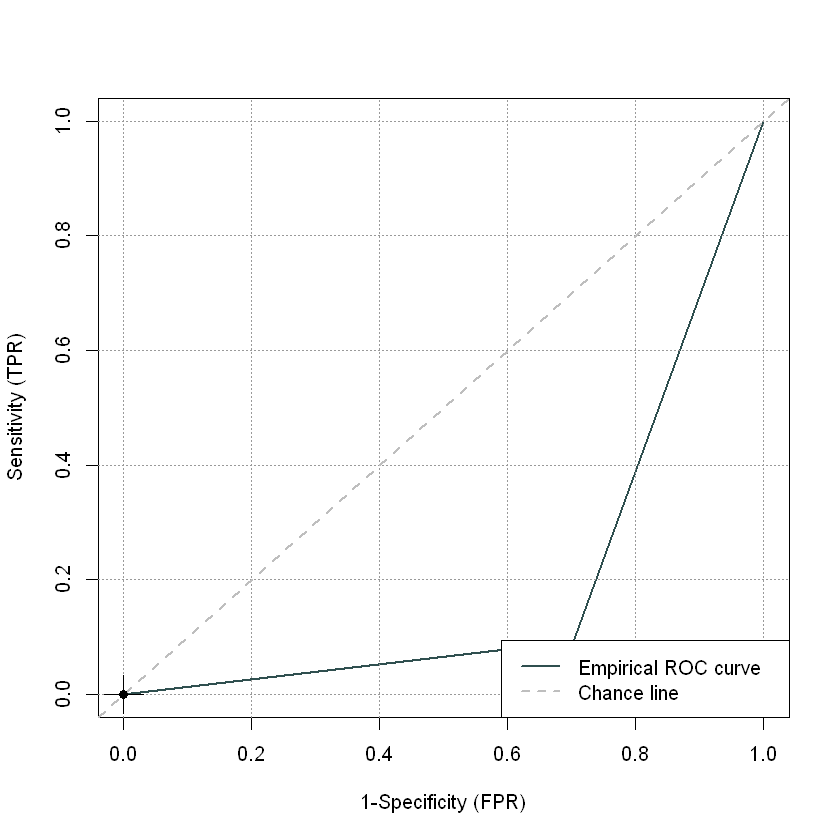

In [126]:
plot(precrec_obj)

In [127]:
pred<- as.factor(pred)
confusionMatrix(pred, result$test.delay)

Warning message in confusionMatrix.default(pred, result$test.delay):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction   1   0
         1  33  16
         0  14 158
                                          
               Accuracy : 0.8643          
                 95% CI : (0.8119, 0.9065)
    No Information Rate : 0.7873          
    P-Value [Acc > NIR] : 0.00229         
                                          
                  Kappa : 0.6008          
                                          
 Mcnemar's Test P-Value : 0.85513         
                                          
            Sensitivity : 0.7021          
            Specificity : 0.9080          
         Pos Pred Value : 0.6735          
         Neg Pred Value : 0.9186          
             Prevalence : 0.2127          
         Detection Rate : 0.1493          
   Detection Prevalence : 0.2217          
      Balanced Accuracy : 0.8051          
                                          
       'Positive' Class : 1               
                              